<a href="https://colab.research.google.com/github/aruaru0/pytorch-tests/blob/main/timm_mixup_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 15.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [3]:
import torchvision
import torch
import matplotlib.pyplot as plt

from timm.data.mixup import Mixup

In [4]:
img0 = torchvision.io.read_image('0.png')/255
img1 = torchvision.io.read_image('1.png')/255
img2 = torchvision.io.read_image('2.png')/255
img3 = torchvision.io.read_image('3.png')/255

In [37]:
mixup_args = {
    'mixup_alpha': 1.,
    'cutmix_alpha': 0.,
    'cutmix_minmax': None,
    'prob': 1.0,
    'switch_prob': 0.,
    'mode': 'batch',
    'label_smoothing': 0,
    'num_classes': 3}

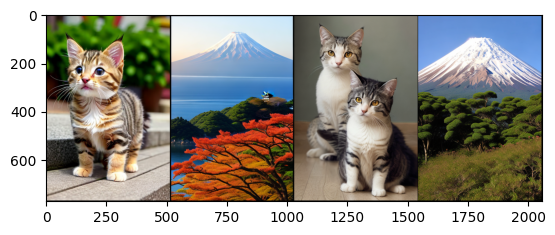

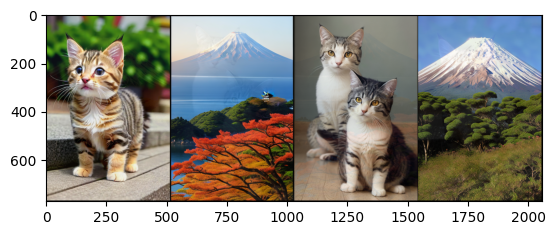

tensor([[0.9089, 0.0911, 0.0000],
        [0.0911, 0.9089, 0.0000],
        [0.9089, 0.0911, 0.0000],
        [0.0911, 0.9089, 0.0000]])


In [38]:
inputs = torch.stack([img0, img1, img2, img3])
labels = torch.tensor([0, 1, 0, 1])

out = torchvision.utils.make_grid(inputs)
plt.imshow(out.permute(1, 2, 0))
plt.show()

mixup_fn = Mixup(**mixup_args)
res_imgs, res_labels = mixup_fn(inputs, labels)

out = torchvision.utils.make_grid(res_imgs)
plt.imshow(out.permute(1, 2, 0))
plt.show()
print(res_labels)

In [32]:
mixup_args = {
    'mixup_alpha': 1.,
    'cutmix_alpha': 0.,
    'cutmix_minmax': None,
    'prob': 1.0,
    'switch_prob': 0.,
    'mode': 'batch',
    'label_smoothing': 0.1,
    'num_classes': 5}

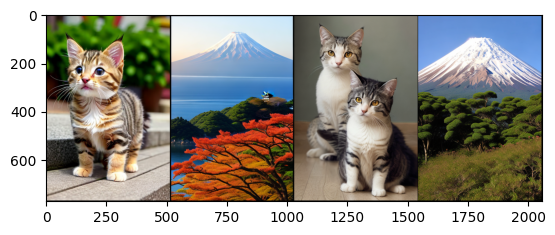

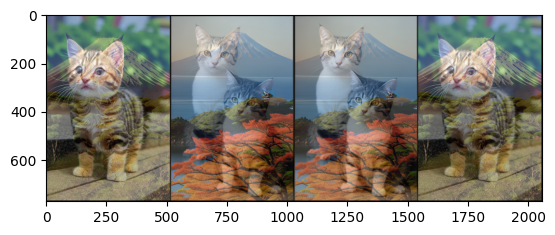

tensor([[0.5034, 0.4366, 0.0200, 0.0200, 0.0200],
        [0.4366, 0.5034, 0.0200, 0.0200, 0.0200],
        [0.5034, 0.4366, 0.0200, 0.0200, 0.0200],
        [0.4366, 0.5034, 0.0200, 0.0200, 0.0200]])


In [33]:
inputs = torch.stack([img0, img1, img2, img3])
labels = torch.tensor([0, 1, 0, 1])

out = torchvision.utils.make_grid(inputs)
plt.imshow(out.permute(1, 2, 0))
plt.show()

mixup_fn = Mixup(**mixup_args)
res_imgs, res_labels = mixup_fn(inputs, labels)

out = torchvision.utils.make_grid(res_imgs)
plt.imshow(out.permute(1, 2, 0))
plt.show()
print(res_labels)

## オリジナルを破壊するのでもう一度オリジナルを作る

In [34]:
mixup_args = {
    'mixup_alpha': 0.,
    'cutmix_alpha': 1.0,
    'cutmix_minmax': None,
    'prob': 1.0,
    'switch_prob': 0.,
    'mode': 'batch',
    'label_smoothing': 0,
    'num_classes': 3}

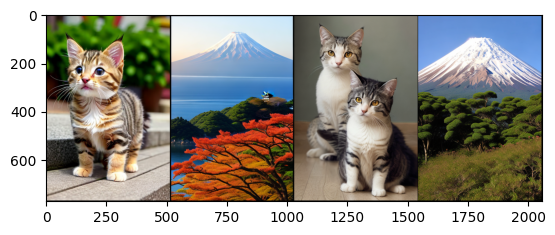

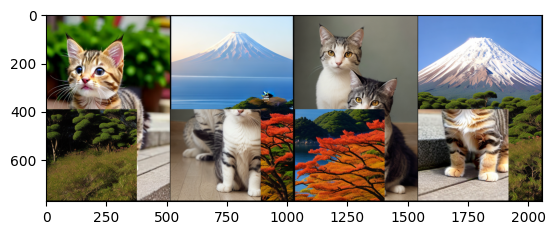

tensor([[0.6405, 0.3595, 0.0000],
        [0.3595, 0.6405, 0.0000],
        [0.6405, 0.3595, 0.0000],
        [0.3595, 0.6405, 0.0000]])


In [35]:
inputs = torch.stack([img0, img1, img2, img3])
labels = torch.tensor([0, 1, 0, 1])

out = torchvision.utils.make_grid(inputs)
plt.imshow(out.permute(1, 2, 0))
plt.show()

mixup_fn = Mixup(**mixup_args)
res_imgs, res_labels = mixup_fn(inputs, labels)

out = torchvision.utils.make_grid(res_imgs)
plt.imshow(out.permute(1, 2, 0))
plt.show()
print(res_labels)